In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [2]:
OUT='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2021-10-20/'
FIGS=OUT

In [3]:
DATA='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2021-10-20/'
elts=pd.read_csv(DATA+'element_scoresFRiP.0.2.MIN_FRAGS.1000.MIN_TSS.1.csv',sep='\t')
elts.head()

,cBAF,ncBAF,PBAF,loops,PROMOTERS,cBAF.ncBAF.PBAF,cBAF.ncBAF,ncBAF.PBAF,cBAF.PBAF,cBAFonly,...,cBAFonly..tss.,cBAFonly..distal.,ncBAFonly..tss.,ncBAFonly..distal.,PBAFonly..tss.,PBAFonly..distal.,not.bound.by.BAF..tss.,not.bound.by.BAF..distal.,ko,nCount_peaks
"R1.30,R2.68,R3.88,ARID1A_rep2",0.312190,0.837120,0.667199,0.423462,0.090704,0.830461,0.775328,0.762487,0.786114,-1.796860,...,-1.582377,-1.413590,0.255241,0.903837,-0.887844,0.485685,-1.874260,-0.247497,ARID1A,9220
"R1.78,R2.87,R3.52,BRD9_rep2",0.524879,-0.345651,0.520615,-1.634752,0.389593,-0.467711,-0.385543,-0.047753,0.559792,-0.130022,...,-0.171019,-0.074735,-0.191417,-1.968221,-1.779636,-0.619846,-0.450426,-0.480334,BRD9,734
"R1.30,R2.96,R3.61,ARID1A_rep2",-0.545174,-0.432548,-0.257964,0.265215,0.456936,-0.137202,-0.419223,0.078224,-0.184574,-0.309578,...,0.883773,-0.794874,-0.652247,-0.852357,-0.490472,-1.136093,0.012084,2.307668,ARID1A,6086
"R1.44,R2.64,R3.87,SMARCA4_rep2",0.597900,-0.162399,-0.392368,-0.589860,-0.283579,0.132252,0.376083,-0.337982,0.276916,0.231851,...,-0.019057,0.278711,-1.043760,0.396977,-0.093168,-1.145380,-0.816935,0.737900,SMARCA4,2176
"R1.32,R2.03,R3.05,ARID1A_rep2",-0.304912,1.151005,0.872970,1.334995,-0.285168,0.702202,0.520158,1.130653,0.628981,-2.394595,...,-1.005419,-1.995657,0.472896,0.996274,-0.950154,0.950516,-1.106402,0.602892,ARID1A,6336


In [4]:
#also bring the RNA
DATA='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/'

atac_mapping=pd.read_csv(DATA+'.jordan.atac_cellname_map.csv')
atac_mapping.index=atac_mapping.loc[:,'old_name']

#now, read in share rna

# load the RNA and ATAC data
rnapath=DATA+'jordan.rna.hg19.UMIcounts.csv.gz'
fragpath=DATA+'jordan.atac.hg19.rmdup.cutoff.labelnames.bed.gz'


arata=sc.read(DATA+'.RNA.filtered.h5ad')
arata

AnnData object with n_obs × n_vars = 3073 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [5]:
arata=arata[arata.obs['total_counts']>2000,:]
arata

View of AnnData object with n_obs × n_vars = 1079 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [6]:
rna_labels=pd.read_csv(DATA+'.jordan.rna_cellname_map.csv')
rna_labels.index=rna_labels['old_name']
rna_labels.head()

common=list(set(arata.obs_names).intersection(set(list(rna_labels.index))))
print(len(common))

arata.obs['sample']=rna_labels.loc[arata.obs_names,'label']
ko=[]
for i in range(arata.n_obs):
    ko.append(arata.obs['sample'][i].split('_')[0])
arata.obs['ko']=ko

arata.obs_names=rna_labels.loc[arata.obs_names,'new_name']

Trying to set attribute `.obs` of view, copying.


1079


In [7]:
elts

,cBAF,ncBAF,PBAF,loops,PROMOTERS,cBAF.ncBAF.PBAF,cBAF.ncBAF,ncBAF.PBAF,cBAF.PBAF,cBAFonly,...,cBAFonly..tss.,cBAFonly..distal.,ncBAFonly..tss.,ncBAFonly..distal.,PBAFonly..tss.,PBAFonly..distal.,not.bound.by.BAF..tss.,not.bound.by.BAF..distal.,ko,nCount_peaks
"R1.30,R2.68,R3.88,ARID1A_rep2",0.312190,0.837120,0.667199,0.423462,0.090704,0.830461,0.775328,0.762487,0.786114,-1.796860,...,-1.582377,-1.413590,0.255241,0.903837,-0.887844,0.485685,-1.874260,-0.247497,ARID1A,9220
"R1.78,R2.87,R3.52,BRD9_rep2",0.524879,-0.345651,0.520615,-1.634752,0.389593,-0.467711,-0.385543,-0.047753,0.559792,-0.130022,...,-0.171019,-0.074735,-0.191417,-1.968221,-1.779636,-0.619846,-0.450426,-0.480334,BRD9,734
"R1.30,R2.96,R3.61,ARID1A_rep2",-0.545174,-0.432548,-0.257964,0.265215,0.456936,-0.137202,-0.419223,0.078224,-0.184574,-0.309578,...,0.883773,-0.794874,-0.652247,-0.852357,-0.490472,-1.136093,0.012084,2.307668,ARID1A,6086
"R1.44,R2.64,R3.87,SMARCA4_rep2",0.597900,-0.162399,-0.392368,-0.589860,-0.283579,0.132252,0.376083,-0.337982,0.276916,0.231851,...,-0.019057,0.278711,-1.043760,0.396977,-0.093168,-1.145380,-0.816935,0.737900,SMARCA4,2176
"R1.32,R2.03,R3.05,ARID1A_rep2",-0.304912,1.151005,0.872970,1.334995,-0.285168,0.702202,0.520158,1.130653,0.628981,-2.394595,...,-1.005419,-1.995657,0.472896,0.996274,-0.950154,0.950516,-1.106402,0.602892,ARID1A,6336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"R1.25,R2.23,R3.45,ARID1A_rep2",-0.352852,-0.868832,-0.056306,0.734478,-0.000271,-0.861333,-1.109403,-0.861664,-0.086979,-0.134445,...,0.550070,-0.478721,0.599763,1.021423,0.777888,-1.109482,1.210089,0.215438,ARID1A,245
"R1.91,R2.40,R3.53,SMARCA4_rep1",0.321067,0.303712,1.215367,-0.344915,1.091045,0.995268,0.963061,0.620170,0.843784,-1.306645,...,-0.550815,-1.226732,-0.193624,-1.649148,1.438996,1.731910,0.187060,-0.401963,SMARCA4,377
"R1.67,R2.29,R3.91,BRD9_rep1",0.011812,0.063095,-0.786253,0.251243,-0.115954,-0.299552,0.174551,-0.666508,-0.846620,1.461941,...,0.358739,1.455887,1.296704,0.394892,1.535692,-0.398068,-1.633867,-0.155606,BRD9,368
"R1.86,R2.70,R3.65,ARID1A_rep2",0.242440,-0.593581,0.015076,0.557500,0.501080,-0.587210,-0.355579,-0.916015,0.102383,-0.126681,...,1.558156,-1.181376,1.755664,-1.308399,1.862035,-1.224468,0.743588,-0.514199,ARID1A,557


In [8]:
#bring the atac counts and LSI
f='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2021-10-20/atac1.highqcells.FRiP.0.2.MIN_FRAGS.1000.MIN_TSS.1.LSI.csv'
cell2lsi=pd.read_csv(f,sep='\t')


In [9]:
common=list(set(arata.obs_names).intersection(set(cell2lsi.index)))
print(len(common))

1044


In [10]:
arata2=arata[common,:]
arata2

View of AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [11]:
sc.pp.scale(arata2,max_value=10)

/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [12]:
cell2lsi2=cell2lsi.loc[common,]

In [13]:
for c in ['cBAFonly','ncBAFonly','PBAFonly']:
    arata2.obs[c]=elts.loc[arata2.obs_names,c]

In [14]:
cell_colors=pd.DataFrame({'color':'white'},index=common)
cell_colors.loc[arata2[common,:].obs['ko'].isin(['ARID1A','SMARCD2']),'color']='blue'
cell_colors.loc[arata2[common,:].obs['ko'].isin(['SMARCA4']),'color']='lightgray'
cell_colors.loc[arata2[common,:].obs['ko'].isin(['BRD9']),'color']='darkgreen'
cell_colors.loc[arata2[common,:].obs['ko'].isin(['NTC']),'color']='orange'



In [23]:
?plt.legend()

Object `plt.legend()` not found.


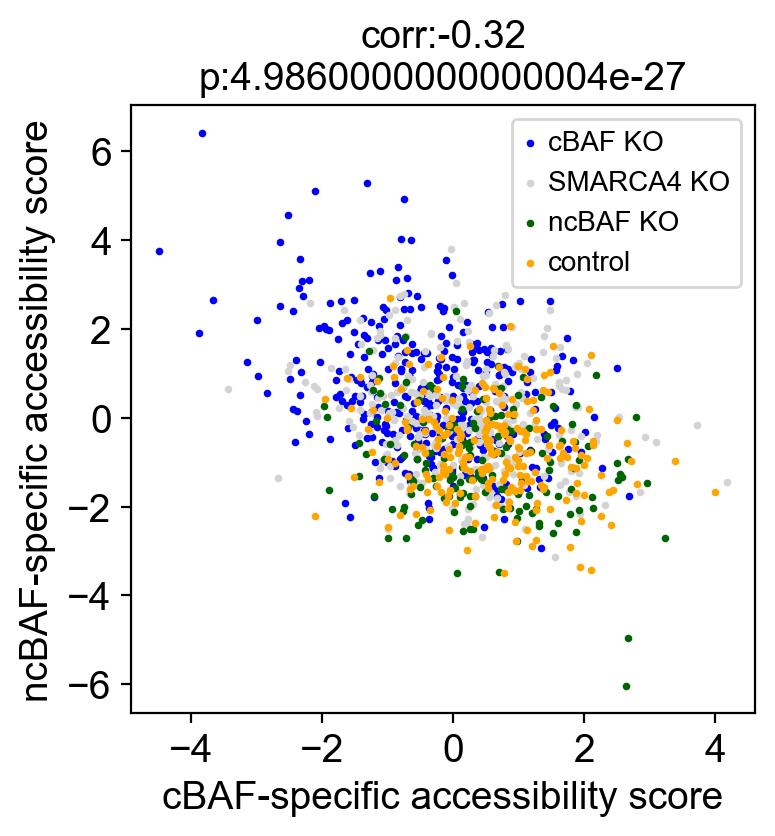

In [32]:
dd={'blue':'cBAF KO','darkgreen':'ncBAF KO','lightgray':'SMARCA4 KO','orange':'control'}

for colo in set(cell_colors.loc[arata2.obs_names]['color']):
    
    cells_here=arata2.obs_names[cell_colors.loc[arata2.obs_names]['color']==colo]

    plt.scatter(arata2.obs['cBAFonly'].loc[cells_here],arata2.obs['ncBAFonly'].loc[cells_here],
                c=colo,#=cell_colors.loc[arata2.obs_names]['color'],
                label=dd[colo],
                s=3,
               )
    from scipy.stats import spearmanr

    sp,p=spearmanr(arata2.obs['cBAFonly'],arata2.obs['ncBAFonly'])
    plt.title('corr:'+str(np.round(sp,2))+'\np:'+str(np.round(p,30)))
    plt.xlabel('cBAF-specific accessibility score')
    plt.ylabel('ncBAF-specific accessibility score')

    plt.grid(False)
plt.legend(fontsize=10,loc='upper right')
plt.savefig(OUT+'cbaf_ncbaf.triangle2.pdf',transparent=True)

In [33]:
OUT

'/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2021-10-20/'

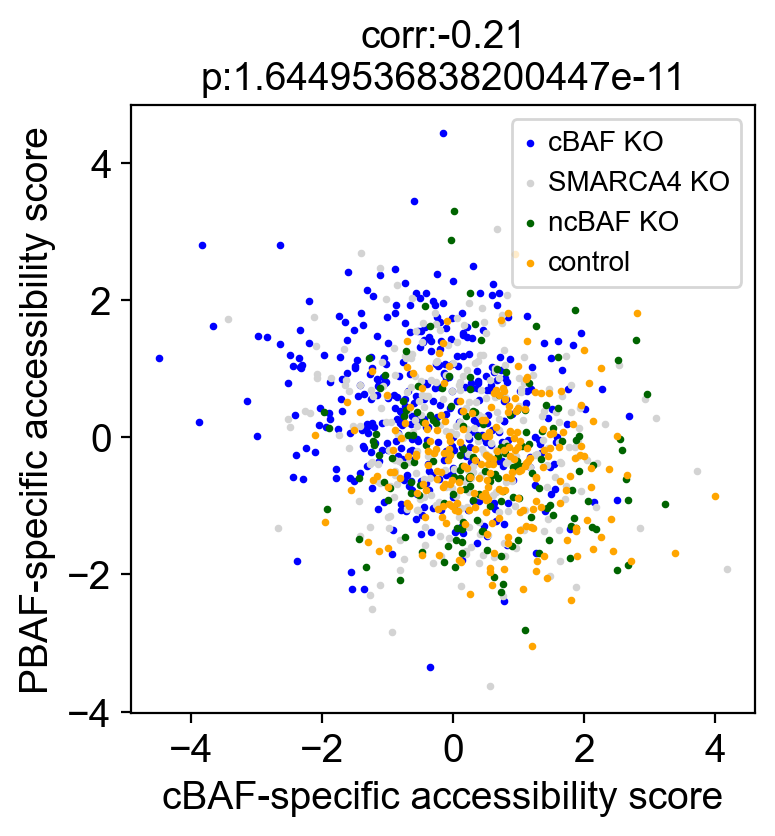

In [31]:
dd={'blue':'cBAF KO','darkgreen':'ncBAF KO','lightgray':'SMARCA4 KO','orange':'control'}

for colo in set(cell_colors.loc[arata2.obs_names]['color']):
    
    cells_here=arata2.obs_names[cell_colors.loc[arata2.obs_names]['color']==colo]

    plt.scatter(arata2.obs['cBAFonly'].loc[cells_here],arata2.obs['PBAFonly'].loc[cells_here],
                c=colo,#=cell_colors.loc[arata2.obs_names]['color'],
                label=dd[colo],
                s=3,
               )
    from scipy.stats import spearmanr

    sp,p=spearmanr(arata2.obs['cBAFonly'],arata2.obs['PBAFonly'])
    plt.title('corr:'+str(np.round(sp,2))+'\np:'+str(np.round(p,30)))
    plt.xlabel('cBAF-specific accessibility score')
    plt.ylabel('PBAF-specific accessibility score')

    plt.grid(False)
plt.legend(fontsize=10,loc='upper right')
plt.savefig(OUT+'cbaf_pbaf.triangle2.pdf',transparent=True)

<ipython-input-22-67ae5b92e67f>:5: UserWarning: Legend does not support 'blue' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles=['blue','green','gray','red'], labels=['1','2','3','4'])
<ipython-input-22-67ae5b92e67f>:5: UserWarning: Legend does not support 'green' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles=['blue','green','gray','red'], labels=['1','2','3','4'])
<ipython-input-22-67ae5b92e67f>:5: UserWarning: Legend does not support 'gray' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles=['blue','green','gray','red'], labels=['1','2','3','4'])
<ipython-inp

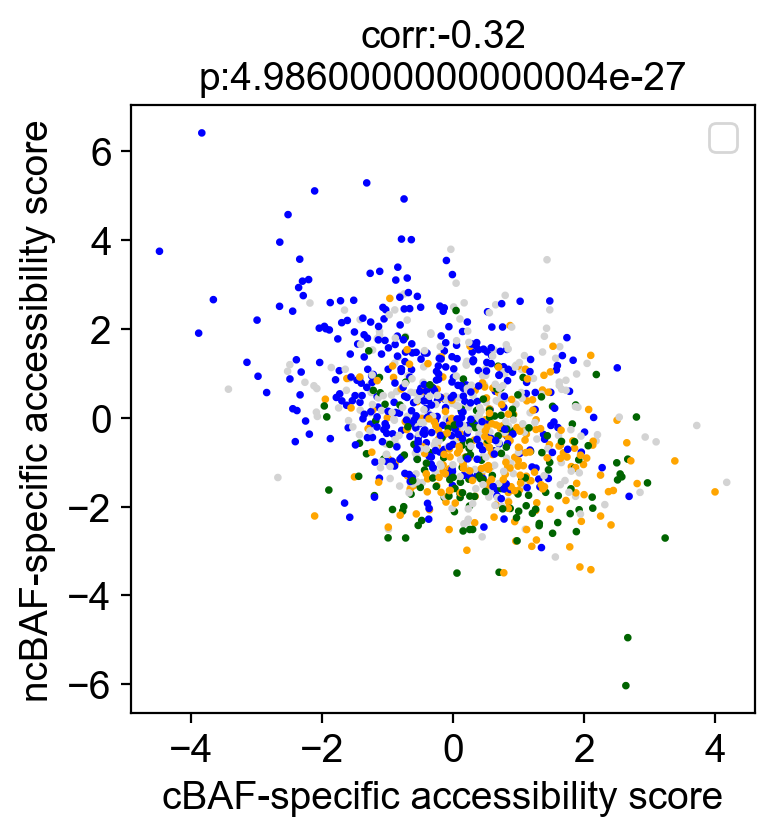

In [22]:
a=plt.scatter(arata2.obs['cBAFonly'],arata2.obs['ncBAFonly'],
            c=cell_colors.loc[arata2.obs_names]['color'],
            s=3,
           )
plt.legend(handles=['blue','green','gray','red'], labels=['1','2','3','4'])
from scipy.stats import spearmanr

sp,p=spearmanr(arata2.obs['cBAFonly'],arata2.obs['ncBAFonly'])
plt.title('corr:'+str(np.round(sp,2))+'\np:'+str(np.round(p,30)))
plt.xlabel('cBAF-specific accessibility score')
plt.ylabel('ncBAF-specific accessibility score')

plt.grid(False)
plt.savefig(OUT+'cbaf_ncbaf.triangle2.pdf',transparent=True)

In [26]:
ctrl_cells=list(cell_colors.loc[cell_colors['color']=='orange',:].index)

from scipy.stats import spearmanr

sp,p=spearmanr(arata2.obs['cBAFonly'].loc[ctrl_cells],
               arata2.obs['ncBAFonly'].loc[ctrl_cells])
print('corr:'+str(np.round(sp,2))+'\np:'+str(np.round(p,30)))


corr:-0.2
p:0.0024286774630253517


In [27]:
ctrl_cells=list(cell_colors.loc[cell_colors['color']=='orange',:].index)

from scipy.stats import spearmanr

sp,p=spearmanr(arata2.obs['cBAFonly'].loc[ctrl_cells],
               arata2.obs['PBAFonly'].loc[ctrl_cells])
print('corr:'+str(np.round(sp,2))+'\np:'+str(np.round(p,30)))


corr:-0.07
p:0.27828614776336924


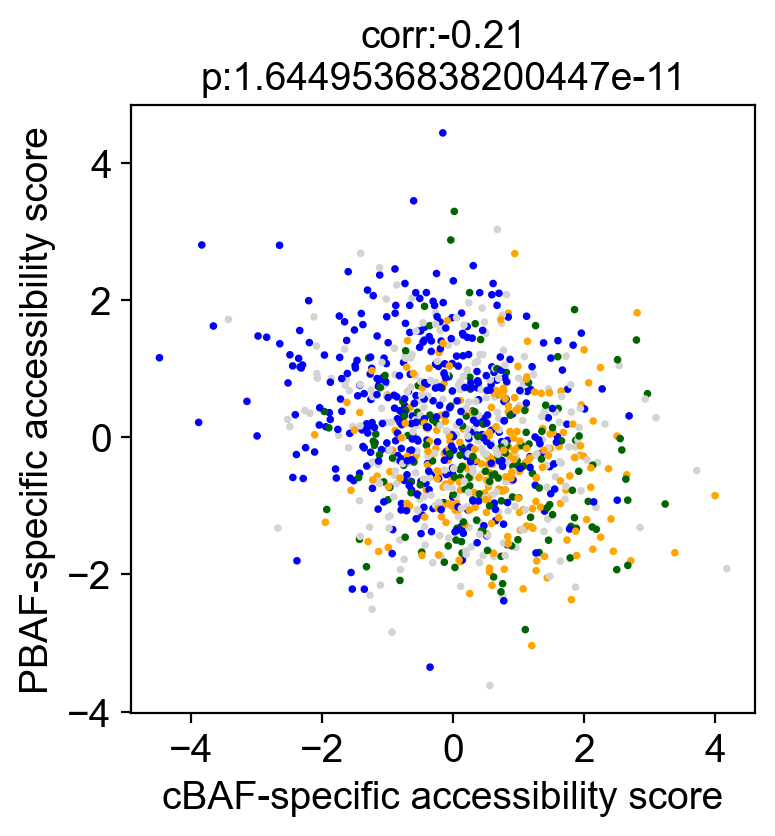

In [25]:
plt.scatter(arata2.obs['cBAFonly'],arata2.obs['PBAFonly'],
            c=cell_colors.loc[arata2.obs_names]['color'],
            s=3,
           )
sp,p=spearmanr(arata2.obs['cBAFonly'],arata2.obs['PBAFonly'])
plt.title('corr:'+str(np.round(sp,2))+'\np:'+str(np.round(p,30)))
plt.xlabel('cBAF-specific accessibility score')
plt.ylabel('PBAF-specific accessibility score')

plt.grid(False)
plt.savefig(OUT+'cbaf_pbaf.triangle2.pdf',transparent=True)

In [35]:
#bring in gene programa from the single dataset
DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide"
pref=DATA+'/Baf.single_gene'
adata=sc.read(pref+'.guide_qc.lm.h5ad')
adata

Only considering the two last: ['.lm', '.h5ad'].
Only considering the two last: ['.lm', '.h5ad'].


AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

In [36]:
arata

AnnData object with n_obs × n_vars = 1079 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [37]:
arata2

AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'cBAFonly', 'ncBAFonly', 'PBAFonly'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'

In [38]:
adata

AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

In [39]:
genes_compare=list(set(adata.var_names).intersection(set(arata2.var_names)))
len(genes_compare)

1121

In [40]:
def subtract_columns_mean(dataset,columns_to_subtract):
    columns_keep=list(set(dataset.columns).difference(set(columns_to_subtract)))
    columns_mean=dataset.loc[:,columns_to_subtract].mean(axis=1)
    new_dataset=dataset.T-columns_mean.T
    return(new_dataset.T)

In [41]:
perturbs=['NTC_rep1','NTC_rep2',
         'ARID1A_rep1','ARID1A_rep2',
          'SMARCD2_rep1','SMARCD2_rep2',
          'SMARCA4_rep1','SMARCA4_rep2',
          'BRD9_rep1','BRD9_rep2',
         ]

In [60]:
#score the programs in share-seq
#score all gene programs
for pro in set(adata.var['new_program']):
    print(pro)
    pro_genes=list(adata.var_names[adata.var['new_program']==pro])
    sc.tl.score_genes(arata2,pro_genes,score_name=str(pro),use_raw=True)

computing score 'P6'


P6


    finished: added
    'P6', score of gene set (adata.obs).
    999 total control genes are used. (0:00:00)
computing score 'P12'


P12


    finished: added
    'P12', score of gene set (adata.obs).
    649 total control genes are used. (0:00:00)
computing score 'P3'


P3


    finished: added
    'P3', score of gene set (adata.obs).
    945 total control genes are used. (0:00:00)
computing score 'P7'


P7


    finished: added
    'P7', score of gene set (adata.obs).
    798 total control genes are used. (0:00:00)
computing score 'P10'


P10


    finished: added
    'P10', score of gene set (adata.obs).
    906 total control genes are used. (0:00:00)
computing score 'P4'


P4


    finished: added
    'P4', score of gene set (adata.obs).
    845 total control genes are used. (0:00:00)
computing score 'P9'


P9


    finished: added
    'P9', score of gene set (adata.obs).
    997 total control genes are used. (0:00:00)
computing score 'P8'


P8


    finished: added
    'P8', score of gene set (adata.obs).
    794 total control genes are used. (0:00:00)
computing score 'P2'


P2


    finished: added
    'P2', score of gene set (adata.obs).
    748 total control genes are used. (0:00:00)
computing score 'P5'


P5


    finished: added
    'P5', score of gene set (adata.obs).
    997 total control genes are used. (0:00:00)
computing score 'P0'


P0


    finished: added
    'P0', score of gene set (adata.obs).
    657 total control genes are used. (0:00:00)
computing score 'P1'


P1


    finished: added
    'P1', score of gene set (adata.obs).
    845 total control genes are used. (0:00:00)
computing score 'P11'


P11


    finished: added
    'P11', score of gene set (adata.obs).
    845 total control genes are used. (0:00:00)


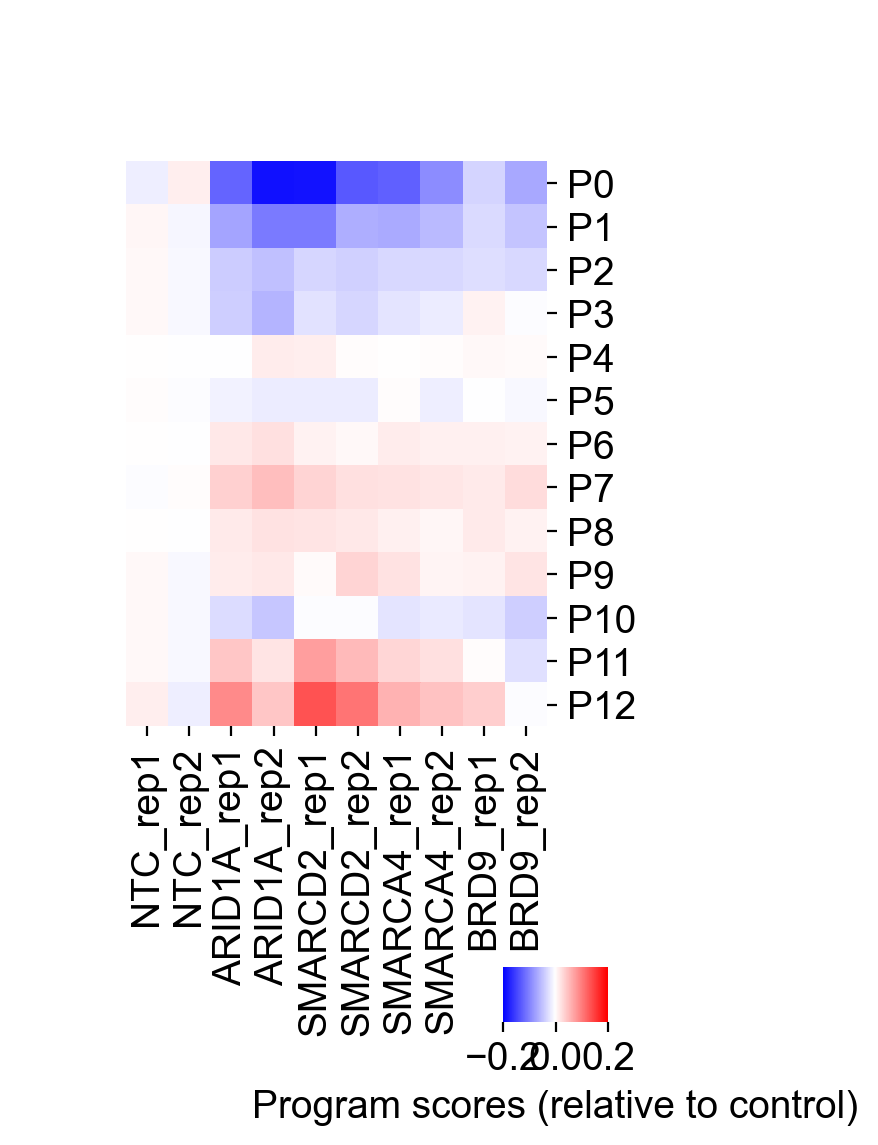

In [64]:
import seaborn as sns

programs=['P' + str(x) for x in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

perturb.pp.obs_mean(arata2,grouping_variable='sample',obs=programs,
                   outpref='pro.mean')

arata_probulk_normntc=subtract_columns_mean(arata2.uns['pro.mean'].T.loc[:,perturbs],
                      ['NTC_rep1','NTC_rep2'])


x=0.2
g=sns.clustermap(arata_probulk_normntc.loc[:,perturbs],
               row_cluster=False,
                 col_cluster=False,
               yticklabels=True,
                 xticklabels=True,
               figsize=(3.5,5.5),
               cbar_pos=(0.75, 0.05, 0.15, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "Program scores (relative to control)",
                'ticks':[-x,0,x]},
               cmap='bwr',vmin=-x,vmax=x)

plt.savefig(FIGS+'gene.pro.x.shareseq.pdf',transparent=True)
plt.savefig(FIGS+'gene.pro.x.shareseq.png',transparent=True)

In [68]:
programs

['P0',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12']

In [69]:
arata2

AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'cBAFonly', 'ncBAFonly', 'PBAFonly', 'Gene pro P6', 'Gene pro P12', 'Gene pro P3', 'Gene pro P7', 'Gene pro P10', 'Gene pro P4', 'Gene pro P9', 'Gene pro P8', 'Gene pro P2', 'Gene pro P5', 'Gene pro P0', 'Gene pro P1', 'Gene pro P11', 'P6', 'P12', 'P3', 'P7', 'P10', 'P4', 'P9', 'P8', 'P2', 'P5', 'P0', 'P1', 'P11'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'pro.mean'

In [70]:
elts

,cBAF,ncBAF,PBAF,loops,PROMOTERS,cBAF.ncBAF.PBAF,cBAF.ncBAF,ncBAF.PBAF,cBAF.PBAF,cBAFonly,...,cBAFonly..tss.,cBAFonly..distal.,ncBAFonly..tss.,ncBAFonly..distal.,PBAFonly..tss.,PBAFonly..distal.,not.bound.by.BAF..tss.,not.bound.by.BAF..distal.,ko,nCount_peaks
"R1.30,R2.68,R3.88,ARID1A_rep2",0.312190,0.837120,0.667199,0.423462,0.090704,0.830461,0.775328,0.762487,0.786114,-1.796860,...,-1.582377,-1.413590,0.255241,0.903837,-0.887844,0.485685,-1.874260,-0.247497,ARID1A,9220
"R1.78,R2.87,R3.52,BRD9_rep2",0.524879,-0.345651,0.520615,-1.634752,0.389593,-0.467711,-0.385543,-0.047753,0.559792,-0.130022,...,-0.171019,-0.074735,-0.191417,-1.968221,-1.779636,-0.619846,-0.450426,-0.480334,BRD9,734
"R1.30,R2.96,R3.61,ARID1A_rep2",-0.545174,-0.432548,-0.257964,0.265215,0.456936,-0.137202,-0.419223,0.078224,-0.184574,-0.309578,...,0.883773,-0.794874,-0.652247,-0.852357,-0.490472,-1.136093,0.012084,2.307668,ARID1A,6086
"R1.44,R2.64,R3.87,SMARCA4_rep2",0.597900,-0.162399,-0.392368,-0.589860,-0.283579,0.132252,0.376083,-0.337982,0.276916,0.231851,...,-0.019057,0.278711,-1.043760,0.396977,-0.093168,-1.145380,-0.816935,0.737900,SMARCA4,2176
"R1.32,R2.03,R3.05,ARID1A_rep2",-0.304912,1.151005,0.872970,1.334995,-0.285168,0.702202,0.520158,1.130653,0.628981,-2.394595,...,-1.005419,-1.995657,0.472896,0.996274,-0.950154,0.950516,-1.106402,0.602892,ARID1A,6336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"R1.25,R2.23,R3.45,ARID1A_rep2",-0.352852,-0.868832,-0.056306,0.734478,-0.000271,-0.861333,-1.109403,-0.861664,-0.086979,-0.134445,...,0.550070,-0.478721,0.599763,1.021423,0.777888,-1.109482,1.210089,0.215438,ARID1A,245
"R1.91,R2.40,R3.53,SMARCA4_rep1",0.321067,0.303712,1.215367,-0.344915,1.091045,0.995268,0.963061,0.620170,0.843784,-1.306645,...,-0.550815,-1.226732,-0.193624,-1.649148,1.438996,1.731910,0.187060,-0.401963,SMARCA4,377
"R1.67,R2.29,R3.91,BRD9_rep1",0.011812,0.063095,-0.786253,0.251243,-0.115954,-0.299552,0.174551,-0.666508,-0.846620,1.461941,...,0.358739,1.455887,1.296704,0.394892,1.535692,-0.398068,-1.633867,-0.155606,BRD9,368
"R1.86,R2.70,R3.65,ARID1A_rep2",0.242440,-0.593581,0.015076,0.557500,0.501080,-0.587210,-0.355579,-0.916015,0.102383,-0.126681,...,1.558156,-1.181376,1.755664,-1.308399,1.862035,-1.224468,0.743588,-0.514199,ARID1A,557


In [72]:
motifs_plot=set()

for p in ['ARID1A','SMARCD2','SMARCA4','BRD9']:

    motiff='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2021-10-20/motif_DE_'+p+'.FRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.csv'
    motif=pd.read_csv(motiff,sep='\t')
    motif_name=[]
    for i in range(motif.shape[0]):
        m=list(motif['motif.name'])[i]
        if ':' in m:
            m=m.split('::')[1]
        motif_name.append(m)

    motif.index=motif['motif.name']
    motif['signed_mlogp']=np.multiply(np.sign(motif['avg_log2FC']),
                                      -np.log10(motif['p_val_adj']))
    
    fdr=0.1
    motifs_plot_here=set(list(motif.loc[motif['p_val_adj']<fdr,:].index))
    motifs_plot=motifs_plot.union(motifs_plot_here)
motifs_plot=list(motifs_plot)

In [73]:
f='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2021-10-20/motif_chromvar.scores.FRiP.0.2.MIN_FRAGS.1000.MIN_TSS.1.csv'
mscores=pd.read_csv(f,sep='\t')
mscores=mscores.loc[common,:]
mscores['sample']=arata2.obs['sample']
mscores=mscores.drop(['ko'],axis=1)
mscores.head()

,FOXF2,FOXD1,IRF2,MZF1(var.2),MAX::MYC,PPARG,PAX6,PBX1,RORA,RORA(var.2),...,TEAD4,TFAP2A,TFAP2C(var.2),TWIST1,USF1,USF2,YY2,ZNF263,CREM,sample
"R1.23,R2.16,R3.91,ARID1A_rep1",-1.960278,-0.486883,-0.755111,-0.754470,1.335748,0.498943,1.224591,-0.853785,1.673180,-0.603846,...,0.297652,-0.231744,-0.689010,-0.821485,1.249692,0.909473,1.772859,0.770554,-1.011973,ARID1A_rep1
"R1.94,R2.93,R3.43,SMARCA4_rep2",-0.226190,1.288006,-0.584817,-0.225353,0.756432,0.537613,0.177560,1.055446,-0.965312,0.834478,...,-0.469962,1.277989,0.000976,-1.311888,-0.641627,-1.907519,0.562133,0.544409,0.629926,SMARCA4_rep2
"R1.09,R2.93,R3.17,NTC_rep2",-0.593990,-1.974977,0.302498,-0.771987,-0.478258,0.942638,0.582417,1.885244,-0.381536,0.331731,...,1.881387,1.129512,1.452758,-0.892992,-0.138332,-0.484373,0.051721,1.325155,-0.850840,NTC_rep2
"R1.95,R2.69,R3.93,SMARCA4_rep2",-1.633152,0.107362,-0.414957,-0.429939,1.858597,1.381239,0.430591,-0.102898,1.056765,0.786616,...,0.710968,-0.420147,-0.583016,1.373859,-0.309071,-0.107785,1.179952,-1.438926,0.105293,SMARCA4_rep2
"R1.65,R2.15,R3.56,BRD9_rep1",-1.657113,-1.230757,-0.653810,0.439986,-0.079550,1.360984,-0.105475,0.230800,-1.433683,-0.876108,...,0.135550,1.115170,1.119607,1.629137,-0.797794,-1.076299,-1.236180,-0.805239,0.255311,BRD9_rep1


In [75]:
len(common)

1044

In [76]:
arata2

AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'cBAFonly', 'ncBAFonly', 'PBAFonly', 'Gene pro P6', 'Gene pro P12', 'Gene pro P3', 'Gene pro P7', 'Gene pro P10', 'Gene pro P4', 'Gene pro P9', 'Gene pro P8', 'Gene pro P2', 'Gene pro P5', 'Gene pro P0', 'Gene pro P1', 'Gene pro P11', 'P6', 'P12', 'P3', 'P7', 'P10', 'P4', 'P9', 'P8', 'P2', 'P5', 'P0', 'P1', 'P11'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'pro.mean'

In [77]:
for c in mscores.columns:
    arata2.obs[c]=mscores.loc[common,c]
arata2

AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'cBAFonly', 'ncBAFonly', 'PBAFonly', 'Gene pro P6', 'Gene pro P12', 'Gene pro P3', 'Gene pro P7', 'Gene pro P10', 'Gene pro P4', 'Gene pro P9', 'Gene pro P8', 'Gene pro P2', 'Gene pro P5', 'Gene pro P0', 'Gene pro P1', 'Gene pro P11', 'P6', 'P12', 'P3', 'P7', 'P10', 'P4', 'P9', 'P8', 'P2', 'P5', 'P0', 'P1', 'P11', 'FOXF2', 'FOXD1', 'IRF2', 'MZF1(var.2)', 'MAX::MYC', 'PPARG', 'PAX6', 'PBX1', 'RORA', 'RORA(var.2)', 'RREB1', 'RXRA::VDR', 'SOX9', 'SRY', 'TAL1::TCF3', 'REL', 'RELA', 'NR1H2::RXRA', 'NFIC::TLX1', 'ZNF354C', 'CTCF', 'EWSR1-FLI1', 'REST', 'NFATC2', 'INSM1', 'RARA::RXRA', 'NR4A2', 'PLAG1', 'ARNT::HIF1A', 'DUX4', 'FOS', 'FOSL2', 'FOXH1', 'JUN', 'JUN(var.2)', 'JUND(var.2)', 'MEF2C', 'MAF::NFE2', 'NR2C2', 'NRF1', 'POU2F2', 'SMAD2::SMAD3::SMAD4', 'STAT1::STAT2', 'TCF7L2', 'ZBTB33', 'ELK4', 'ESR2', 'IRF1', 'STAT1', 'STAT3', 'GA

In [78]:
for c in elts.columns:
    arata2.obs[c]=elts.loc[common,c]
arata2

AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'cBAFonly', 'ncBAFonly', 'PBAFonly', 'Gene pro P6', 'Gene pro P12', 'Gene pro P3', 'Gene pro P7', 'Gene pro P10', 'Gene pro P4', 'Gene pro P9', 'Gene pro P8', 'Gene pro P2', 'Gene pro P5', 'Gene pro P0', 'Gene pro P1', 'Gene pro P11', 'P6', 'P12', 'P3', 'P7', 'P10', 'P4', 'P9', 'P8', 'P2', 'P5', 'P0', 'P1', 'P11', 'FOXF2', 'FOXD1', 'IRF2', 'MZF1(var.2)', 'MAX::MYC', 'PPARG', 'PAX6', 'PBX1', 'RORA', 'RORA(var.2)', 'RREB1', 'RXRA::VDR', 'SOX9', 'SRY', 'TAL1::TCF3', 'REL', 'RELA', 'NR1H2::RXRA', 'NFIC::TLX1', 'ZNF354C', 'CTCF', 'EWSR1-FLI1', 'REST', 'NFATC2', 'INSM1', 'RARA::RXRA', 'NR4A2', 'PLAG1', 'ARNT::HIF1A', 'DUX4', 'FOS', 'FOSL2', 'FOXH1', 'JUN', 'JUN(var.2)', 'JUND(var.2)', 'MEF2C', 'MAF::NFE2', 'NR2C2', 'NRF1', 'POU2F2', 'SMAD2::SMAD3::SMAD4', 'STAT1::STAT2', 'TCF7L2', 'ZBTB33', 'ELK4', 'ESR2', 'IRF1', 'STAT1', 'STAT3', 'GA

In [84]:
import copy

lsi_names=["CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3',
             'cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops',]
#print(lsi_names)
ps=pd.DataFrame(0,index=lsi_names,columns=programs)
corrs=pd.DataFrame(0,index=lsi_names,columns=programs)
pcount=0
for lsi2 in lsi_names:
    for pro in programs:
        from scipy.stats import spearmanr
        sp,p=spearmanr(arata2.obs[pro],arata2.obs[lsi2])
        ps.loc[lsi2,pro]=np.sign(sp)*(-np.log10(pcount+p))
        corrs.loc[lsi2,pro]=sp

In [85]:
import copy
ps2=copy.deepcopy(ps)
#ps2[ps2.abs()<2]=0

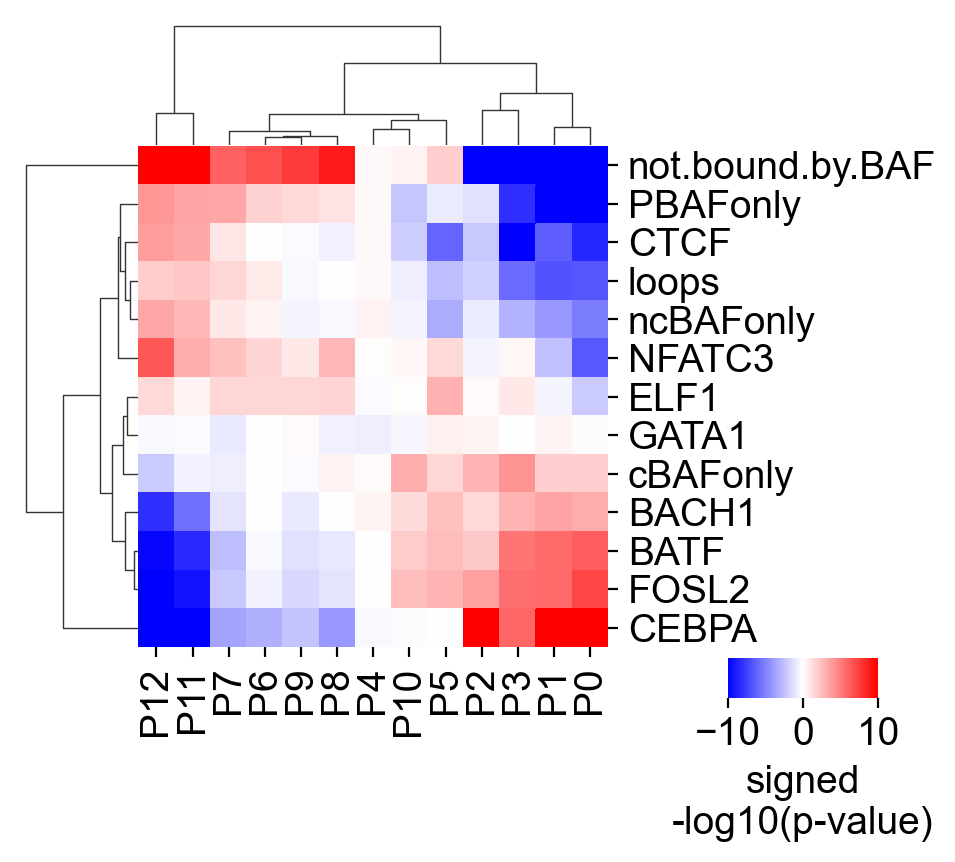

In [90]:
x=10

from scipy.cluster import hierarchy

data=ps2
var_Z = hierarchy.linkage(data,
                         optimal_ordering=True,
                          metric='cityblock',
                                 method='average')
col_Z = hierarchy.linkage(data.T,
                         optimal_ordering=True,
                          metric='cityblock',
                                 method='average')


g=sns.clustermap(ps2,cmap='bwr',vmin=-x,vmax=x,
               row_linkage=var_Z,
               col_linkage=col_Z,
               xticklabels=True,
                 #yticklabels=True,
                 cbar_pos=(0.75, 0.1, 0.15, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "signed\n-log10(p-value)",
                'ticks':[-x,0,x]},
              figsize=(5,4))

x=ps2
reordered_labels = x.index[g.dendrogram_row.reordered_ind].tolist()
use_labels = ["CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3',
             'cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops']
use_ticks = [reordered_labels.index(label) + .5 for label in use_labels]

a=g.ax_heatmap.set(yticks=use_ticks, yticklabels=use_labels)
plt.savefig(FIGS+'features.x.programs.sig.pdf',bbox_inches='tight')
plt.savefig(FIGS+'features.x.programs.sig.png',bbox_inches='tight')

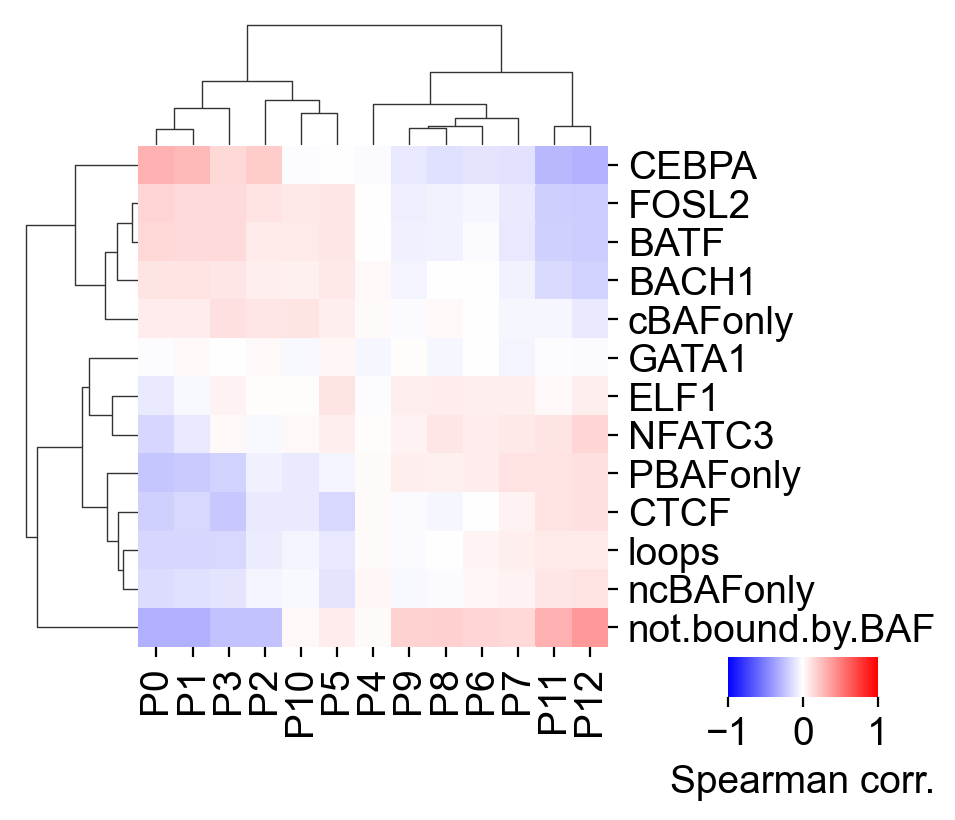

In [91]:
x=1

from scipy.cluster import hierarchy

data=corrs
var_Z = hierarchy.linkage(data,
                         optimal_ordering=True,
                          metric='cityblock',
                                 method='average')
col_Z = hierarchy.linkage(data.T,
                         optimal_ordering=True,
                          metric='cityblock',
                                 method='average')


g=sns.clustermap(corrs,cmap='bwr',vmin=-x,vmax=x,
               row_linkage=var_Z,
               col_linkage=col_Z,
               xticklabels=True,
                 #yticklabels=True,
                 cbar_pos=(0.75, 0.1, 0.15, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "Spearman corr.",
                'ticks':[-x,0,x]},
              figsize=(5,4))

x=corrs
reordered_labels = x.index[g.dendrogram_row.reordered_ind].tolist()
use_labels = ["CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3',
             'cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops']
use_ticks = [reordered_labels.index(label) + .5 for label in use_labels]

a=g.ax_heatmap.set(yticks=use_ticks, yticklabels=use_labels)
plt.savefig(FIGS+'features.x.programs.spcorr.pdf',bbox_inches='tight')
plt.savefig(FIGS+'features.x.programs.spcorr.png',bbox_inches='tight')

In [95]:
#low-dim representation
list(arata2.obs.columns)

['n_genes',
 'n_genes_by_counts',
 'total_counts',
 'total_counts_mt',
 'pct_counts_mt',
 'sample',
 'ko',
 'cBAFonly',
 'ncBAFonly',
 'PBAFonly',
 'Gene pro P6',
 'Gene pro P12',
 'Gene pro P3',
 'Gene pro P7',
 'Gene pro P10',
 'Gene pro P4',
 'Gene pro P9',
 'Gene pro P8',
 'Gene pro P2',
 'Gene pro P5',
 'Gene pro P0',
 'Gene pro P1',
 'Gene pro P11',
 'P6',
 'P12',
 'P3',
 'P7',
 'P10',
 'P4',
 'P9',
 'P8',
 'P2',
 'P5',
 'P0',
 'P1',
 'P11',
 'FOXF2',
 'FOXD1',
 'IRF2',
 'MZF1(var.2)',
 'MAX::MYC',
 'PPARG',
 'PAX6',
 'PBX1',
 'RORA',
 'RORA(var.2)',
 'RREB1',
 'RXRA::VDR',
 'SOX9',
 'SRY',
 'TAL1::TCF3',
 'REL',
 'RELA',
 'NR1H2::RXRA',
 'NFIC::TLX1',
 'ZNF354C',
 'CTCF',
 'EWSR1-FLI1',
 'REST',
 'NFATC2',
 'INSM1',
 'RARA::RXRA',
 'NR4A2',
 'PLAG1',
 'ARNT::HIF1A',
 'DUX4',
 'FOS',
 'FOSL2',
 'FOXH1',
 'JUN',
 'JUN(var.2)',
 'JUND(var.2)',
 'MEF2C',
 'MAF::NFE2',
 'NR2C2',
 'NRF1',
 'POU2F2',
 'SMAD2::SMAD3::SMAD4',
 'STAT1::STAT2',
 'TCF7L2',
 'ZBTB33',
 'ELK4',
 'ESR2',
 'IRF

In [147]:
items=motifs_plot
for i in ['P6',
 'P12',
 'P3',
 'P7',
 'P10',
 'P4',
 'P9',
 'P8',
 'P2',
 'P5',
 'P0',
 'P1',
 'P11',
     'cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops']:
    items.append(i)
print(len(items))

131


In [148]:
corrs=perturb.util.corr_mat(arata2.obs.loc[:,items].T)

In [149]:
corrs.shape

(131, 131)

In [150]:
badata=sc.AnnData(corrs)
badata.obs_names=items
badata

AnnData object with n_obs × n_vars = 131 × 131

In [151]:
sc.pp.pca(badata)

computing PCA
    with n_comps=50
    finished (0:00:00)


In [152]:
sc.pp.neighbors(badata)
sc.tl.umap(badata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


In [153]:
badata

AnnData object with n_obs × n_vars = 131 × 131
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [154]:
pcs=badata.obsm['X_pca']
umaps=badata.obsm['X_umap']

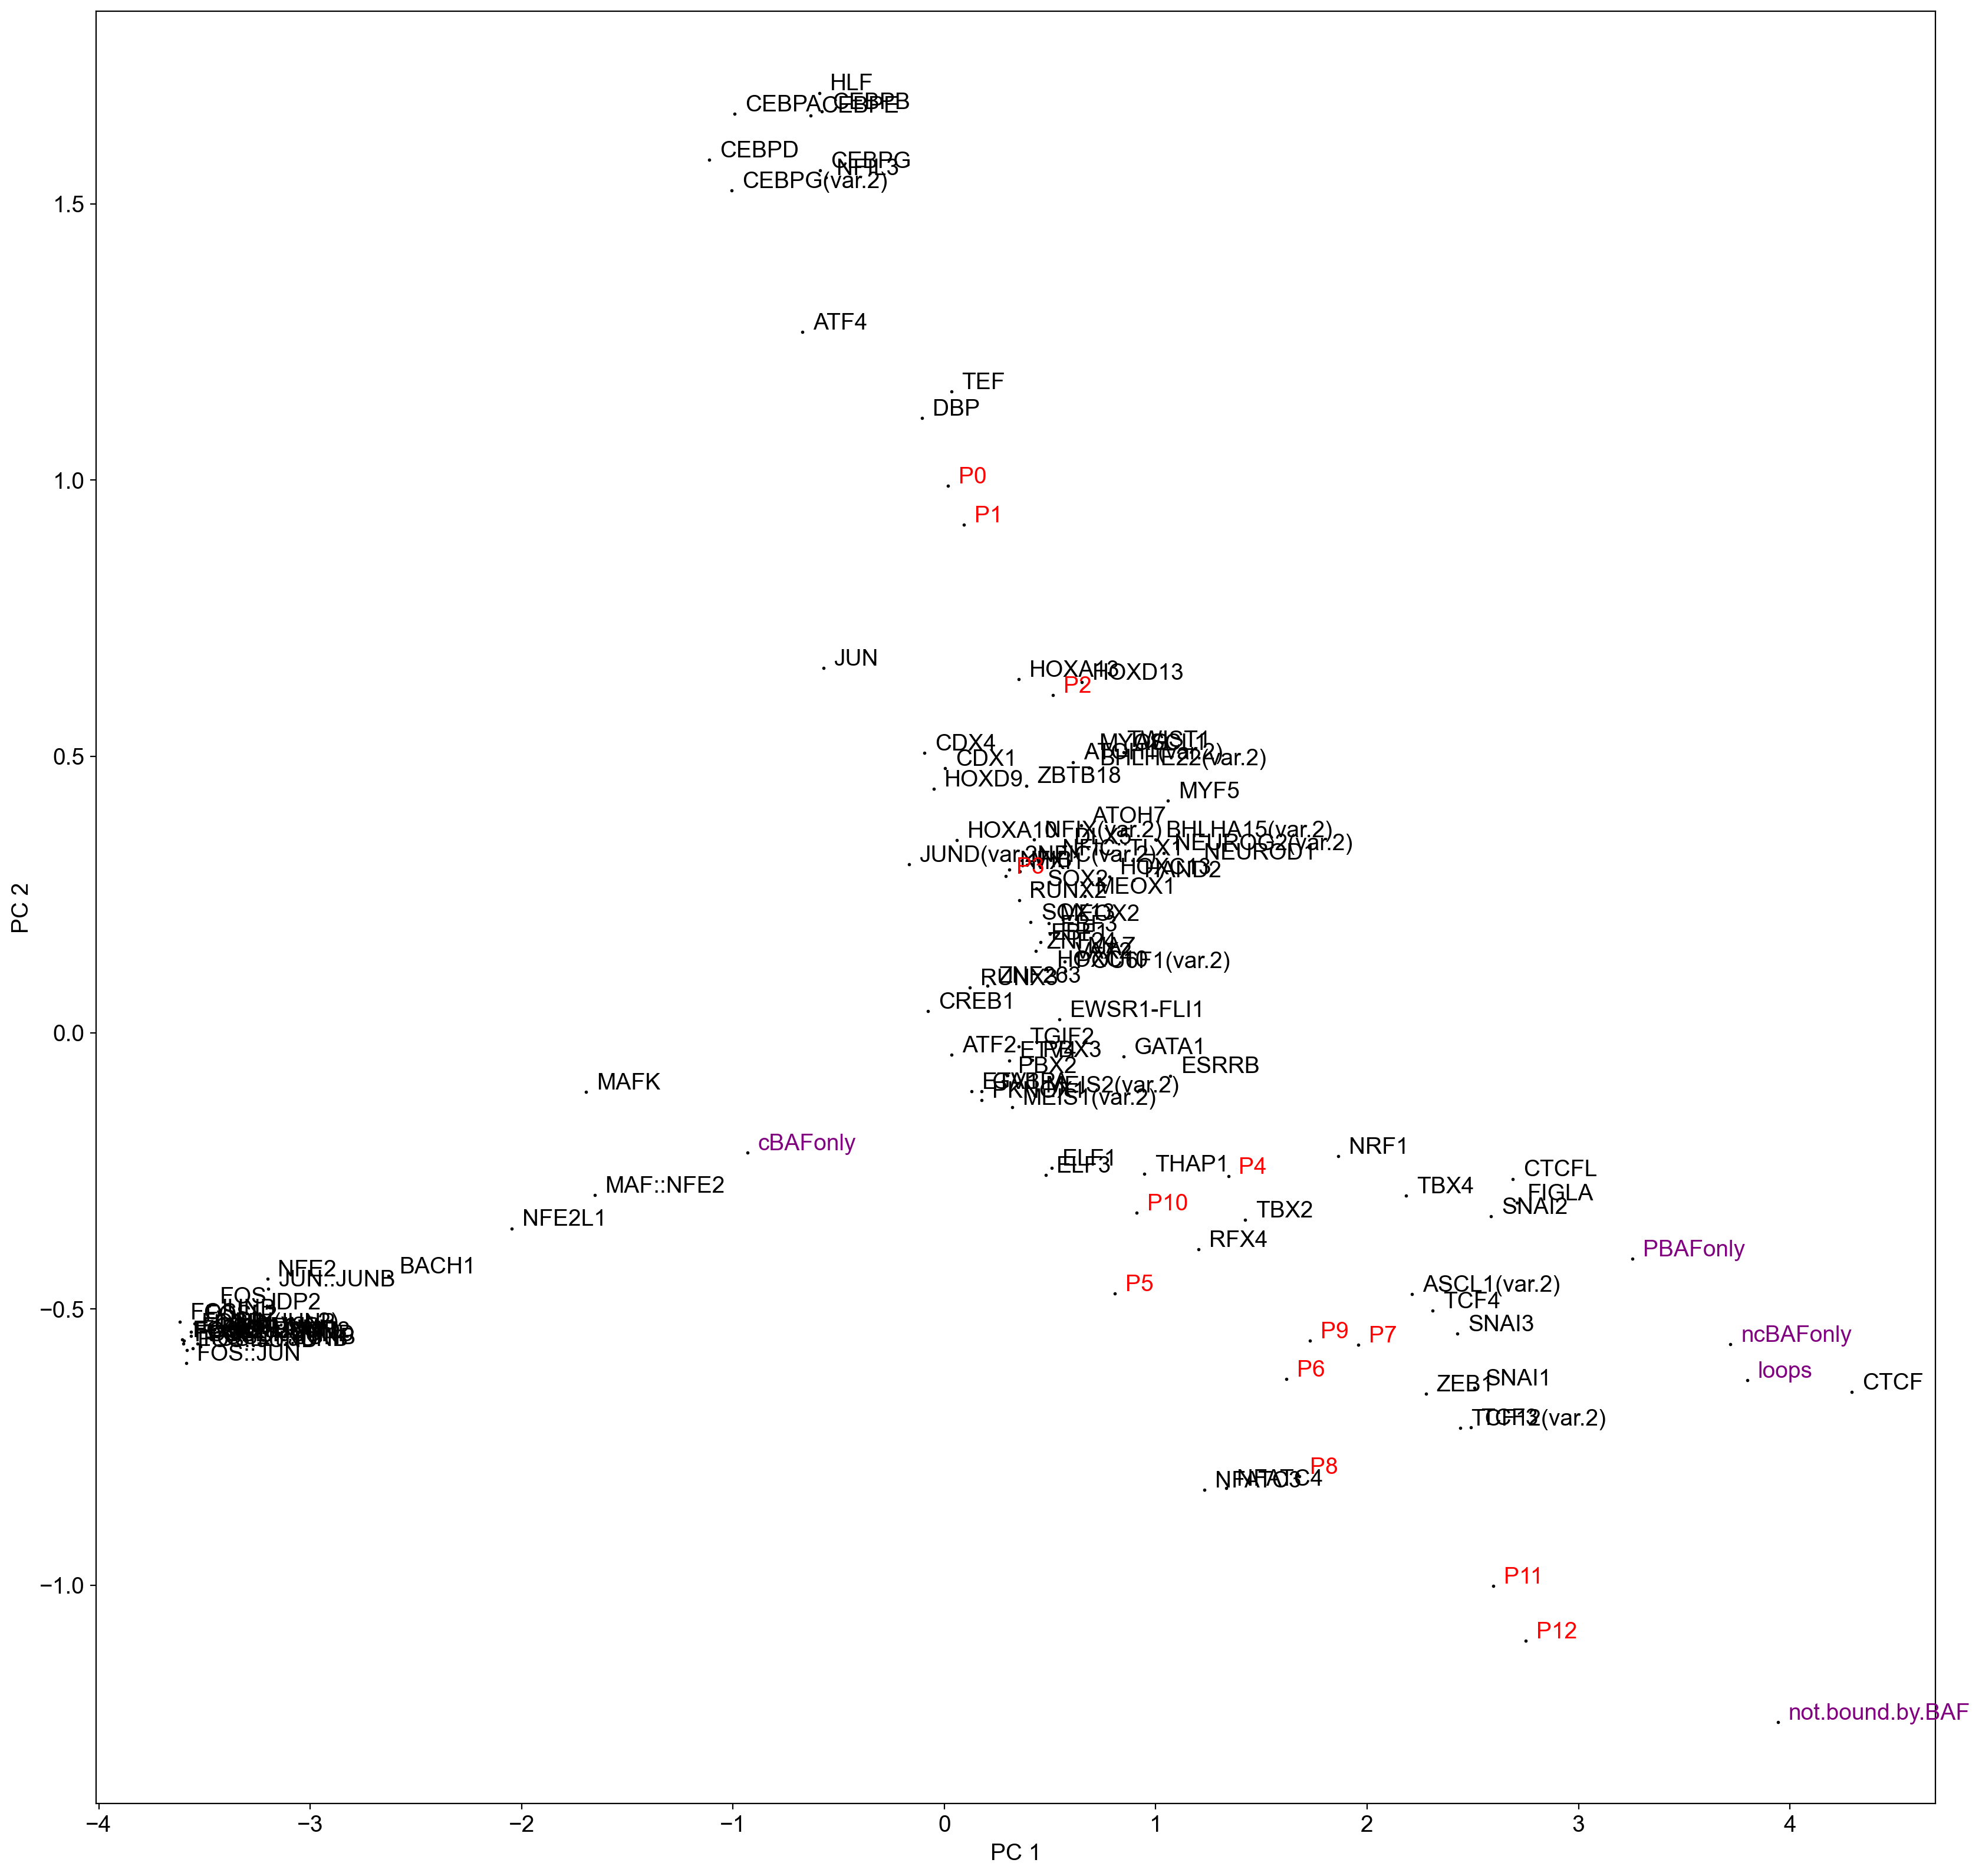

In [171]:
xs=pcs[:,0]
ys=pcs[:,1]
xplus=0.05
yplus=0.005


fig,plots=plt.subplots(1)
fig.set_size_inches(20,20)

plots.scatter(xs,ys,color='black',s=1)
for i, txt in enumerate(badata.obs_names):
    
    '''
    if txt not in ['cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops',
                   "CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3',
                  'P6',
 'P12',
 'P3',
 'P7',
 'P10',
 'P4',
 'P9',
 'P8',
 'P2',
 'P5',
 'P0',
 'P1',
 'P11',]:
        continue
    '''
    
    if txt in ['P6',
 'P12',
 'P3',
 'P7',
 'P10',
 'P4',
 'P9',
 'P8',
 'P2',
 'P5',
 'P0',
 'P1',
 'P11']:
        plots.annotate(txt, (xs[i]+xplus, ys[i]+yplus),color='red')
    elif txt in ['cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops']:
        plots.annotate(txt, (xs[i]+xplus, ys[i]+yplus),color='purple')
    elif txt in ["CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3']:
        plots.annotate(txt, (xs[i]+xplus, ys[i]+yplus),color='black')
    else:
        plots.annotate(txt, (xs[i]+xplus, ys[i]+yplus),color='black')
plt.grid(False)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig(FIGS+'features_pca.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'features_pca.png',transparent=True,bbox_inches='tight')

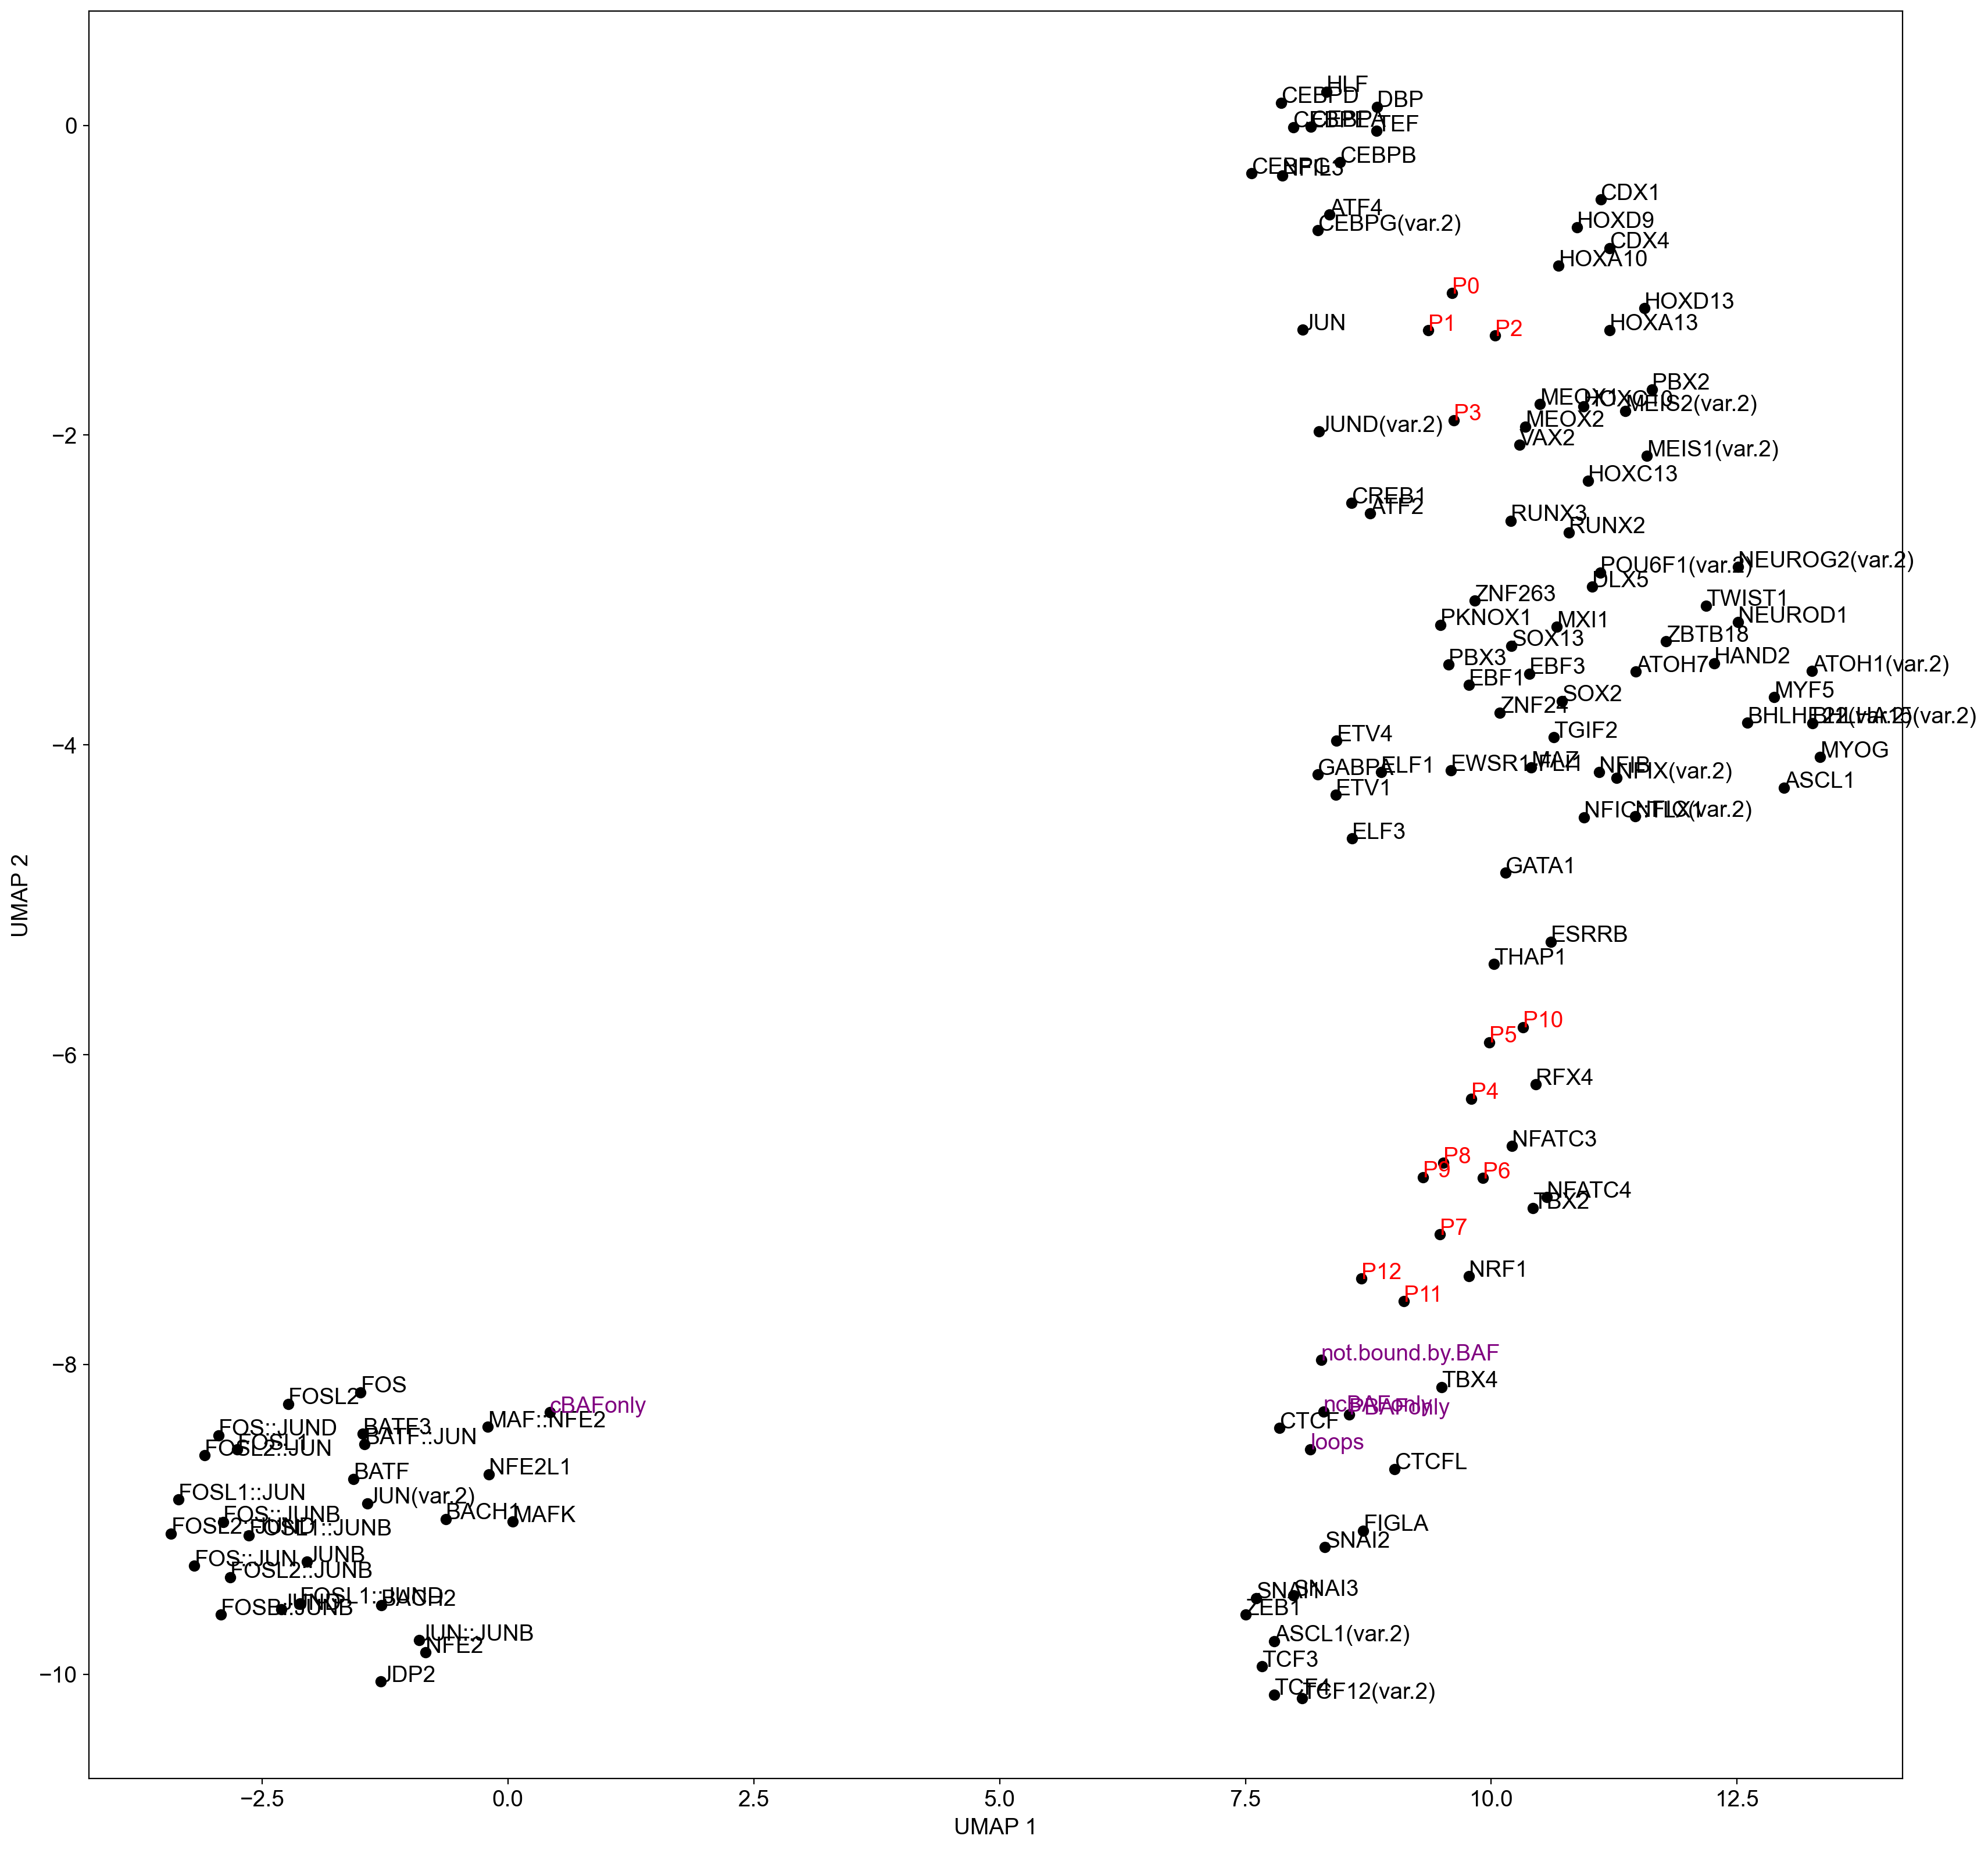

In [157]:
xs=umaps[:,0]
ys=umaps[:,1]

fig,plots=plt.subplots(1)
fig.set_size_inches(20,20)

plots.scatter(xs,ys,color='black')
for i, txt in enumerate(badata.obs_names):
    '''
    if txt not in ['cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops',
                   "CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3',
                  'P6',
 'P12',
 'P3',
 'P7',
 'P10',
 'P4',
 'P9',
 'P8',
 'P2',
 'P5',
 'P0',
 'P1',
 'P11',]:
        continue
    '''
    #if 'HOX' in txt:
    #    print(xs[i],ys[i])
    if txt in ['P6',
 'P12',
 'P3',
 'P7',
 'P10',
 'P4',
 'P9',
 'P8',
 'P2',
 'P5',
 'P0',
 'P1',
 'P11']:
        plots.annotate(txt, (xs[i], ys[i]),color='red')
    elif txt in ['cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops']:
        plots.annotate(txt, (xs[i], ys[i]),color='purple')
    elif txt in ["CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3']:
        plots.annotate(txt, (xs[i], ys[i]),color='black')
    else:
        plots.annotate(txt, (xs[i], ys[i]),color='black')
plt.grid(False)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.savefig(FIGS+'features_umap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'features_umap.png',transparent=True,bbox_inches='tight')